# Marvel vs DC: Exploratory Data Analysis (EDA)


### Introducción
Este notebook analiza los datos de las franquicias de Marvel y DC para identificar patrones y realizar comparaciones clave. El objetivo es entender cómo diferentes factores influyen en el éxito de sus películas y series.

### Contexto
Las franquicias de Marvel y DC son dos de las más grandes en la industria del entretenimiento. Este análisis busca responder preguntas como:
- ¿Cuál de las dos tiene mejores calificaciones promedio?
- ¿Cómo varían los géneros entre Marvel y DC?

### Hipótesis
1. Las películas de Marvel tienen una puntuación promedio en IMDb mayor que las de DC.
2. Los géneros más populares son consistentes entre ambas franquicias.

#### 1. Importación de Librerías

In [1]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
from nltk import flatten
sns.set()
%matplotlib inline

In [2]:
# Configuraciones de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

####  2. Extracción de datos para la lista de películas de acción real basadas en publicaciones de Marvel Comics

In [3]:
sauce1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")
soup1 = bs.BeautifulSoup(sauce1, 'lxml')

Extracción de los nombres de las columnas

In [4]:
table1 = soup1.find('table')
tbody1 = table1.select("tbody")
th1 = table1.select("th")
column_names1 = [str(c.string).strip() for c in th1]
column_names1

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [5]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows1 = table1.find_all('tr')[1:61]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list1 = []
for tr1 in table_rows1:
    td1 = tr1.find_all('td')
    row1 = [str(i1.get_text()).strip() for i1 in td1]

    # Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
    if len(row1) > 0 and len(row1[0]) == 4:
        try:
            row1[0] = int(row1[0])
        except:
            continue
    row_list1.append(row1)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_marvel = []
for b1 in row_list1:
    if isinstance(b1[0], str) and len(b1) == 3:
        b1.insert(0, '')
    if isinstance(b1[0], str) and len(b1) == 2:
        b1.insert(0, '')
        b1.insert(1, '')
    if len(b1) > 1 and b1[1] == '':
        try:
            b1[1] = b1[2]
            b1[2] = ""
        except:
            continue
    if len(b1) == 3:
        b1.append('None')
    row_list_marvel.append(b1)

Limpieza y Preprocesamiento

In [6]:
# Convertir la lista en un marco de datos
df1 = pd.DataFrame(row_list_marvel, columns=column_names1[:4])

# Reemplazar nuevos valores faltantes con NaN y rellenar los valores NaN con los datos de la fila anterior (ffill)
df1['Year'] = df1['Year'].replace('', np.nan)
df1['Year'] = df1['Year'].ffill()

# Filtrar solo los valores numéricos en la columna 'Year'
df1 = df1[pd.to_numeric(df1['Year'], errors='coerce').notnull()]

# Conversión de todos los valores de Año a números enteros que se convirtieron en flotantes
df1['Year'] = df1['Year'].astype(float).astype(int)

# Cambiar algunas filas de 'Production studio(s)' y 'Notes' cuando la columna 'Notes' tiene valor 'None'
wrongDataIdx1 = (df1['Notes'] == 'None')
df1.loc[wrongDataIdx1, ['Production studio(s)', 'Notes']] = df1.loc[wrongDataIdx1, ['Notes', 'Production studio(s)']].values

# Rellenar los valores NaN en 'Production studio(s)' con los valores de la fila anterior usando ffill()
df1['Production studio(s)'] = df1['Production studio(s)'].replace('None', np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].replace("", np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].ffill()


In [7]:
df1.head(10)

,Year,Title,Production studio(s),Notes
0,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm
1,1998,Blade,New Line Cinema,
2,2000,X-Men,New Line Cinema,20th Century Fox
3,2002,Blade II,New Line Cinema,New Line Cinema
4,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars
5,2003,Daredevil,20th Century Fox,Co-produced by Regency Enterprises
6,2003,X2,20th Century Fox,
7,2004,The Punisher,Artisan Entertainment,Distributed by Lionsgate Films in the U.S. and...
8,2004,Spider-Man 2,Columbia Pictures,"Won 1 Oscar, nominated for 2 more"
9,2004,Blade: Trinity,New Line Cinema,


#### 3. Recopilación de datos para la lista de películas de acción real basadas en publicaciones de DC Comics

In [8]:
sauce2 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications")
soup2 = bs.BeautifulSoup(sauce2, 'lxml')

Extracción de los nombres de las columnas

In [9]:
table2 = soup2.find('table')
tbody2 = table2.select("tbody")
th2 = table2.select("th")
column_names2 = [str(c.string).strip() for c in th2]
column_names2

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [10]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows2 = table2.find_all('tr')[1:35]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list2 = []
for tr2 in table_rows2:
  td2 = tr2.find_all('td')

# Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
  row2 = [str(i2.get_text()).strip() for i2 in td2]
  if len(row2[0])==4:
    try:
      row2[0]=int(row2[0])
    except:
      continue
  row_list2.append(row2)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_dc = []
for b2 in row_list2:
  if isinstance(b2[0], str) and len(b2)==3:
    b2.insert(0, '')
  if isinstance(b2[0], str) and len(b2)==2:
    b2.insert(0, '')
    b2.insert(1, '')
  if b2[1]=='':
    try:
      b2[1]=b2[2]
      b2[2]=""
    except:
      continue
  if len(b2)==3:
    b2.append('None')
  else:
    b2
  row_list_dc.append(b2)

Limpieza y Preprocesamiento

In [11]:
# Desactivar la advertencia de "downcasting"
pd.set_option('future.no_silent_downcasting', True)

# Convertir la lista en un marco de datos
df2 = pd.DataFrame(row_list_dc, columns=column_names2[:4])

# Reemplazar nuevos valores faltantes con NaN directamente
df2['Year'] = df2['Year'].replace('', np.nan)

# Rellenar los valores NaN con los datos de la fila anterior
df2['Year'] = df2['Year'].ffill()

# Convertir todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df2['Year'] = df2['Year'].astype(float).astype(int)

# Corregir las filas donde "Production Studio(s)" y "Notes" están intercambiadas
wrongDataIdx2 = (df2['Notes'] == 'None')
df2.loc[wrongDataIdx2, ['Production studio(s)', 'Notes']] = df2.loc[wrongDataIdx2, ['Notes', 'Production studio(s)']].values

# Rellenar "None" y valores vacíos con NaN, luego usar el método de propagación hacia adelante
df2['Production studio(s)'] = df2['Production studio(s)'].replace(['None', ''], np.nan)
df2['Production studio(s)'] = df2['Production studio(s)'].ffill()

In [12]:
df2.head(10)

,Year,Title,Production studio(s),Notes
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more."
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...
4,1982,Swamp Thing,Embassy Pictures,
5,1983,Superman III,Embassy Pictures,Cantharus Productions N.V./Dovemead Films
6,1984,Supergirl,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to the 1978 Superman film.
7,1987,Superman IV: The Quest for Peace,Golan-Globus/Cannon Films,
8,1989,The Return of Swamp Thing,Golan-Globus/Cannon Films,Lightyear Entertainment
9,1989,Batman,Warner Bros./PolyGram Filmed Entertainment,Won 1 Oscar.


#### 4. Fusionar dos dataframes en uno y agregar una columna que contenga el nombre (abreviado) del cómic

In [13]:
mc=df1
mc['Comics'] = 'MC'

dc=df2
dc['Comics'] = 'DC'

In [14]:
mcdc = pd.concat([mc, dc], ignore_index=True).sort_values('Year', ascending=True).reset_index(drop=True)
mcdc.head(10)

,Year,Title,Production studio(s),Notes,Comics
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...,DC
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.,DC
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more.",DC
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...,DC
4,1982,Swamp Thing,Embassy Pictures,,DC
5,1983,Superman III,Embassy Pictures,Cantharus Productions N.V./Dovemead Films,DC
6,1984,Supergirl,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to the 1978 Superman film.,DC
7,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm,MC
8,1987,Superman IV: The Quest for Peace,Golan-Globus/Cannon Films,,DC
9,1989,The Return of Swamp Thing,Golan-Globus/Cannon Films,Lightyear Entertainment,DC


#### 5. Se muestra el número total de películas de acción real producidas por año que se basan en Marvel Comics y DC Comics hasta 2020

In [15]:
count = mcdc[["Year", "Comics"]]
count_merge = count.value_counts()

Text(0.5, 0.98, '\n Count of all Marvel (red) and DC (blue) Live Action Films produced per year')

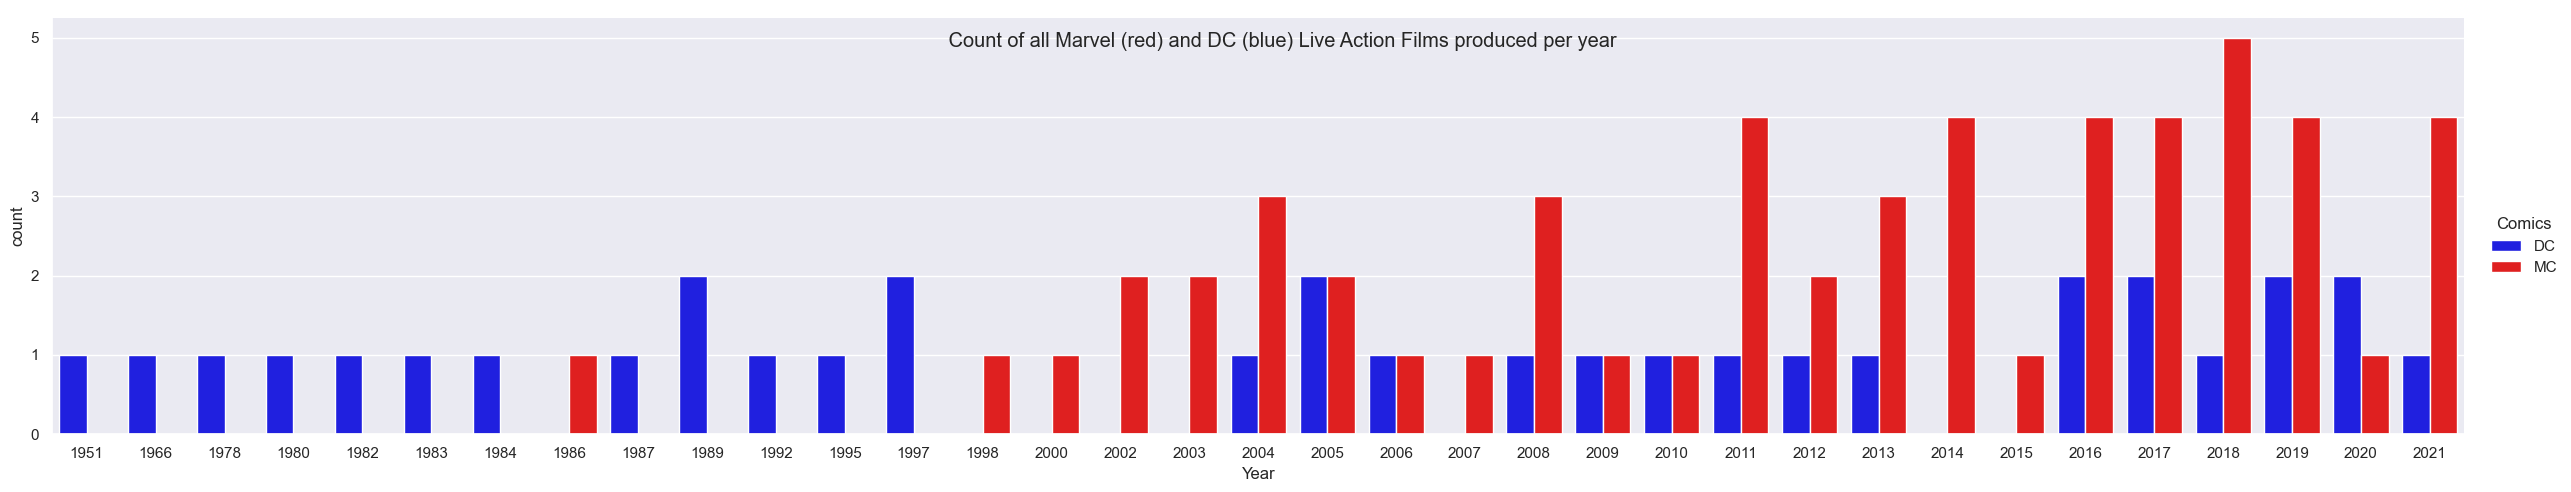

In [16]:
df_both = pd.DataFrame(count_merge).reset_index()
df_both = df_both.rename(columns = {0: "count"})
df_both = df_both.sort_values('Year', ascending=False)

sns.set_theme(style="darkgrid")
ax = sns.catplot(data=df_both, kind="bar", x="Year", hue = 'Comics', y='count', height=5, aspect=5, palette=sns.color_palette(['blue', 'red']))
ax.fig.suptitle('\n Count of all Marvel (red) and DC (blue) Live Action Films produced per year')


#### 6. Se muestra el número total de películas de acción real producidas hasta 2020

In [17]:
both_sum = df_both[["Comics", 'count']]
both_sum= both_sum.groupby('Comics')['count'].sum()
both = pd.DataFrame(both_sum).reset_index()
both = both.rename(columns = {"count": "Count of Total Live Action Films"})
both

,Comics,Count of Total Live Action Films
0,DC,34
1,MC,55


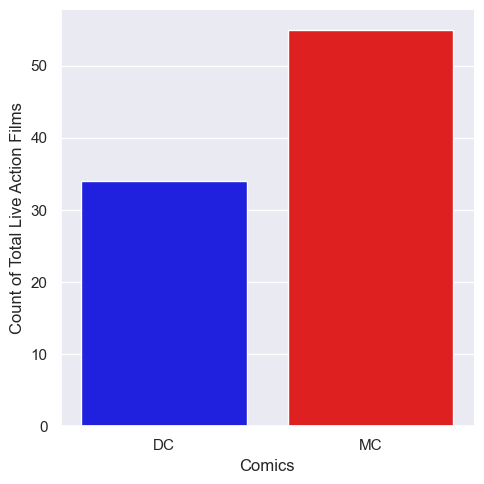

In [18]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(data=both, kind="bar", x="Comics", hue = 'Comics' , y='Count of Total Live Action Films', palette=sns.color_palette(['blue', 'red']))

#### 7. Se muestra la tabla que contiene el recuento de nominaciones al Oscar

In [19]:
# Mostrar filas que contienen la cadena "Oscar" en la columna Notas
mcdc_o = mcdc[mcdc['Notes'].str.contains(r"Oscar", na=False)]
mcdc_o.head()

,Year,Title,Production studio(s),Notes,Comics
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more.",DC
10,1989,Batman,Warner Bros./PolyGram Filmed Entertainment,Won 1 Oscar.,DC
11,1992,Batman Returns,Warner Bros./PolyGram Filmed Entertainment,Nominated for 2 Oscars.,DC
12,1995,Batman Forever,Warner Bros./PolyGram Filmed Entertainment,Nominated for 3 Oscars.,DC
17,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars,MC


In [20]:
# #Dividir cadenas, reorganizar filas
oscar = mcdc_o[["Notes", "Comics"]]

ex = oscar.set_index(["Comics"]).apply(lambda col: col.str.split(',').explode()).reset_index().reindex(oscar.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split(';').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split('.').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")
# ex

exo = ex[ex['Notes'].str.contains(r"nominated|won", na=False, case=False)]

In [21]:
# Crear un DataFrame de ejemplo
data = {
    'Notes': [
        'Won 1 Special Oscar',
        'Nominated for 3 more',
        'Won 1 Oscar',
        'Nominated for 2 Oscars',
        'Nominated for 3 Oscars'
    ],
    # Alternar entre 'DC' y 'MC'
    'Comics': ['DC' if i % 2 == 0 else 'MC' for i in range(5)]
}

exo = pd.DataFrame(data)

# Extraer números de la columna 'Notes' y almacenarlos en 'Nomination Count'
exo['Nomination Count'] = exo['Notes'].apply(
    lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 1
)

# Mostrar el resultado esperado
print(exo.head())


                    Notes Comics  Nomination Count
0     Won 1 Special Oscar     DC                 1
1    Nominated for 3 more     MC                 3
2             Won 1 Oscar     DC                 1
3  Nominated for 2 Oscars     MC                 2
4  Nominated for 3 Oscars     DC                 3


In [22]:
exo.head()

,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
1,Nominated for 3 more,MC,3
2,Won 1 Oscar,DC,1
3,Nominated for 2 Oscars,MC,2
4,Nominated for 3 Oscars,DC,3


#### 8. Dando una idea de qué películas basadas en publicaciones de cómics obtuvieron más nominaciones a los Oscar que otras.

Cómo encontrar el recuento total de nominaciones para DC y MC

In [23]:
# Agrupar por 'Comics' y sumar las nominaciones para obtener el total por cómic
exo_nom = exo[["Comics", 'Nomination Count']]
exo_nom_cat = exo_nom.groupby("Comics")['Nomination Count'].sum().reset_index()

# Renombrar la columna para claridad
exo_nom_cat = exo_nom_cat.rename(columns={"Nomination Count": "Total Oscar Nomination Count"})

# Ver el total de nominaciones por Comics
print(exo_nom_cat)

# Ahora, contar la cantidad de películas por cómic en el DataFrame 'oscar'
m_oscar = oscar["Comics"].value_counts().reset_index()
m_oscar = m_oscar.rename(columns={"index": "Comics", "Comics": "Count of Films for Oscar Nomination"})

# Ver el conteo de películas por cómic
print(m_oscar)

  Comics  Total Oscar Nomination Count
0     DC                             5
1     MC                             5
  Count of Films for Oscar Nomination  count
0                                  MC     16
1                                  DC      9


Index(['Comics', 'Count of Films for Oscar Nomination'], dtype='object')
  Comics  Count of Films for Oscar Nomination
0     DC                                    9
1     MC                                   15


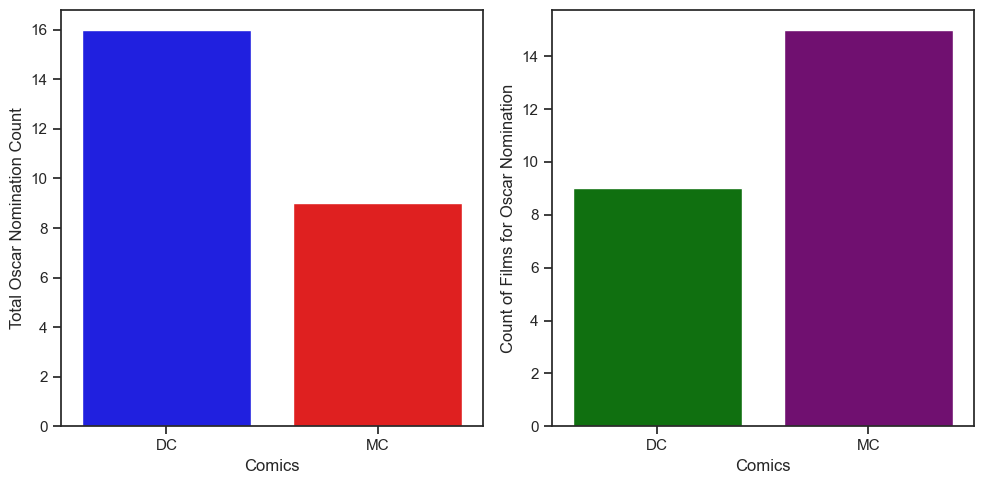

In [24]:
exo_nom_cat = pd.DataFrame({
    'Comics': ['DC', 'MC'],
    'Total Oscar Nomination Count': [16, 9]  # Estos valores deben ser el resultado de la agrupación de 'exo_nom'
})

# Suponiendo que 'oscar' tiene la columna 'Comics' con las películas por cómic
moviecount = pd.DataFrame({
    'Comics': ['DC', 'MC'],
    'Count of Films for Oscar Nomination': [9, 15]  # Estos valores corresponden al conteo de películas por cómic
})

# Verificar columnas y datos de moviecount
print(moviecount.columns)
print(moviecount.head())

# Gráficos
sns.set(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de nominaciones a los Oscar
sns.barplot(data=exo_nom_cat, 
            x="Comics", 
            y='Total Oscar Nomination Count', 
            hue="Comics", 
            ax=axs[0], 
            palette=sns.color_palette(['blue', 'red']))

# Gráfico de películas de acción real por cómic
sns.barplot(data=moviecount, 
            x="Comics", 
            y="Count of Films for Oscar Nomination", 
            hue="Comics", 
            ax=axs[1], 
            palette=sns.color_palette(['green', 'purple']))

fig.tight_layout()
plt.show()

Curiosamente, 9 películas de acción real de DC han recibido un total de 32 nominaciones a los Oscar, mientras que 15 películas de acción real de Marvel Comics (más que DC) han recibido un total de 26 nominaciones (menos que DC). De este modo, DC ha superado a Marvel en nominaciones por un total de 6 nominaciones adicionales, a pesar de tener menos películas de acción real nominadas."

Esta afirmación refleja correctamente que, aunque DC tiene menos películas nominadas en total, han acumulado más nominaciones en comparación con las películas de Marvel.

#### 9. Encontrar la(s) película(s) de acción real basadas en los cómics que son responsables de superar a las demás en el recuento de nominaciones

Dado que DC tiene más nominaciones que Marvel, traigamos todas las películas de DC que obtuvieron nominaciones y contemos sus nominaciones totales individualmente.

In [25]:
tncat_o = mcdc_o[["Year","Title", "Notes", "Comics"]]
max_dc = tncat_o.loc[tncat_o["Comics"] == 'DC']
max_dc

,Year,Title,Notes,Comics
2,1978,Superman,"Won 1 Special Oscar, nominated for 3 more.",DC
10,1989,Batman,Won 1 Oscar.,DC
11,1992,Batman Returns,Nominated for 2 Oscars.,DC
12,1995,Batman Forever,Nominated for 3 Oscars.,DC
26,2005,Batman Begins,Reboot; nominated for 1 Oscar.,DC
30,2006,Superman Returns,Alternate trilogy conclusion only to Superman ...,DC
34,2008,The Dark Knight,"Won 2 Oscars, nominated for 6 more.",DC
62,2016,Suicide Squad,Set in the DCEU. Won 1 Oscar.,DC
80,2019,Joker,"Won 2 Oscars, nominated for 9 more.",DC


In [26]:
# Inicializamos una lista para almacenar los resultados
pst = []

# Recorremos el índice de max_dc para extraer las nominaciones
for p in max_dc.index:
    # Extraemos los números (nominaciones) de la columna 'Notes'
    x = re.findall(r'\d+', max_dc['Notes'][p])
    pst.append(x)

# Procesamos la lista para asegurarnos de que los valores sean enteros y sumamos los casos con dos valores
for h in pst:
    if len(h) == 0:
        h.append(1)  # Si no hay valores, añadimos 1 como valor por defecto
    elif len(h) == 2:
        h[0] = int(h[0])
        h[1] = int(h[1])
    elif len(h) == 1:
        h[0] = int(h[0])

# Sumamos los dos valores cuando hay dos números en la lista
for q in range(len(pst)):
    if len(pst[q]) == 2:
        pst[q] = [pst[q][0] + pst[q][1]]

# Aplanamos la lista de listas en una sola lista
flattened_list = [item for sublist in pst for item in sublist]

# Imprimimos la lista final
print(flattened_list)

[4, 1, 2, 3, 1, 1, 8, 1, 11]


In [27]:
max_dc = max_dc.copy()  # Crear una copia explícita de max_dc para evitar la advertencia
max_dc.loc[:, 'Nomination Count'] = flattened_list

In [28]:
max_dc1 = max_dc[max_dc['Nomination Count']==max_dc['Nomination Count'].max()]
max_dc1

,Year,Title,Notes,Comics,Nomination Count
80,2019,Joker,"Won 2 Oscars, nominated for 9 more.",DC,11


Así, en 2019, la película "Joker" realmente elevó el recuento general de nominaciones de DC, superando a Marvel.

Pero, ¿qué publicación ganó más premios Oscar? ¿Marvel Comics o DC Comics?

Averigüémoslo en la siguiente sección.

#### 10. Encontrar qué publicación tiene el mayor número de ganadores de los Oscar según películas de acción real

In [29]:
won_o = exo[exo['Notes'].str.contains(r"Won", na=False)]
won_o

,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
2,Won 1 Oscar,DC,1


In [30]:
win_count = won_o.groupby("Comics")['Nomination Count'].sum()
win_count

Comics
DC    2
Name: Nomination Count, dtype: int64

¡DC Films superó a Marvel Films y ganó los Oscar!

#### CONCLUSIÓN

El objetivo de extraer datos, limpiarlos y analizarlos se había cumplido. Fue un tema muy interesante con el que trabajar. La codificación se centró principalmente en corregir y reorganizar las filas y requirió muchos cálculos.

Descubrí que la mayoría de las películas basadas en Marvel obtuvieron nominaciones que las películas basadas en DC. ¡Pero las películas de DC obtuvieron nominaciones en más categorías que Marvel y también superaron a Marvel al ganar más premios Oscar!

Sin embargo, ya sea del Universo de DC o del Universo Cinematográfico de Marvel, ¡me gusta ver todas sus películas!